## The Adult dataset

**The information is a replica of the notes for the abalone dataset from the UCI repository.**

**`6 `continuous, `9` nominal attributes.**

## Attribute Information:
 * age: continuous.
 * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 * fnlwgt: continuous.
 * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,    10th, Doctorate, 5th-6th, Preschool.
 * education-num: continuous.
 * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-    op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 * sex: Female, Male.
 * capital-gain: continuous.
 * capital-loss: continuous.
 * hours-per-week: continuous.
 * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 * income: >50K, <=50K

# 1.Importing Libraries :

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import scipy.stats as stats
import scipy
from sklearn.feature_selection import chi2
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics 

# 2. Loading DataSet :


In [2]:
df=pd.read_csv('adult.csv')

# 3. Exploring Data :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**This Dataset contains 15 Columns & 48842 Rows. It has int64 and object Datatypes**

In [4]:
# exploring data statistically
statisticalSummary = df.describe()
statisticalSummary

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# 4. Data Preprocessing :

## 4.1 Data Cleaning :

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
# Check duplicate data exist

check_dup = df.duplicated().any() 
print("Are there any duplicated values in data? ",check_dup)

if check_dup:
    df = df.drop_duplicates()
else:
    print("There are not duplicated values in data.")

Are there any duplicated values in data?  True


**Our Data has few Duplicates. so, we are dropping it.**

In [7]:
col=['workclass','occupation','native-country']
for i in col:
    print(df[i].unique())

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


**In the column `workclass`,`occupation`,`native-country` few values are `?` . so, we are replacing with nan**

In [8]:
df.replace('?',np.NaN,inplace=True)

In [9]:
(df.isnull().sum()/len(df))*100

age                0.000000
workclass          5.728633
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.749129
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754458
income             0.000000
dtype: float64

**After replacing with NaN there are missing values i.e., around `5-6%`**

**There are two types for handling the Missing values :**                        
 **1. Dropping Null values.**                  
 **2. Filling with mean & mode**              

### 4.1.1. Dropping Null values :

In [10]:
drop_df=df.dropna()

**After Dropping null values the size our data is (45175, 15)**                              

**3615 rows are droppped**                            

**Around 7.5% data is lossed**

In [11]:
drop_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### 4.1.2. Filling with mean & mode :

In [12]:
fill_df=df.copy()

In [13]:
col=['workclass','occupation','native-country']
for i in col:
    mod=fill_df[i].mode()[0]
    fill_df[i].fillna(mod,inplace=True)

In [14]:
fill_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Here , After filling the null values without having any loss of Data.**

# 5. Data Visualisation :

### 5.1 Univariate Analysis :

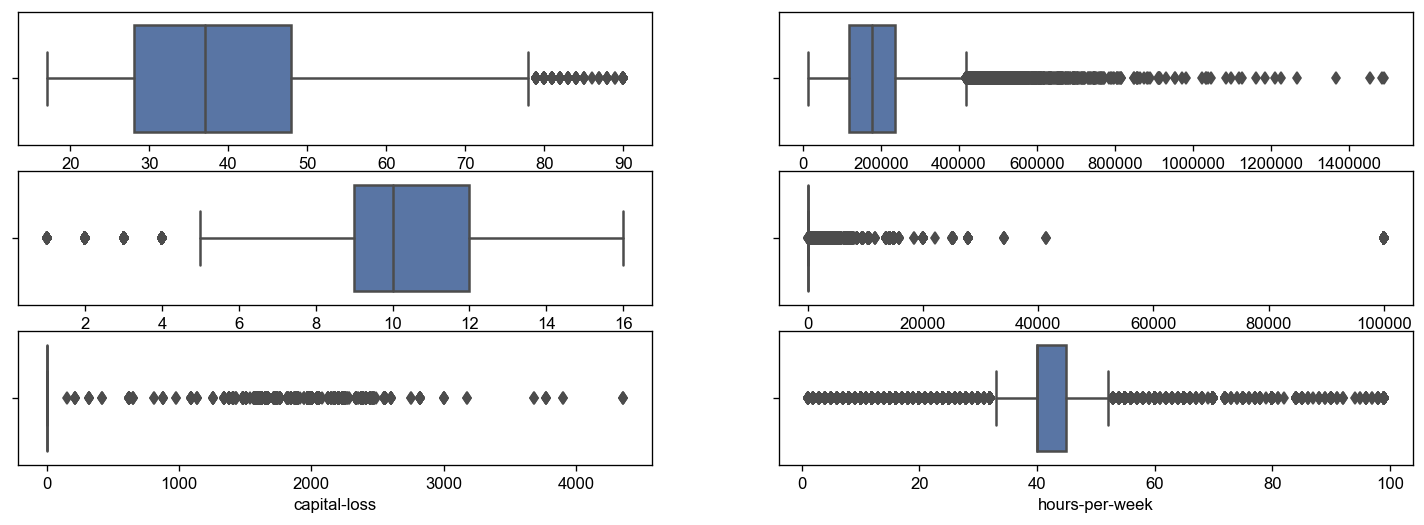

In [15]:
fig, ax = plt.subplots(3,2, figsize=(15,5),dpi=120)
sns.set()
sns.boxplot(fill_df['age'],ax=ax[0][0])             
sns.boxplot(fill_df['fnlwgt'],ax=ax[0][1])
sns.boxplot(fill_df['educational-num'],ax=ax[1][0])              
sns.boxplot(fill_df['capital-gain'],ax=ax[1][1])
sns.boxplot(fill_df['capital-loss'],ax=ax[2][0])              
sns.boxplot(fill_df['hours-per-week'],ax=ax[2][1])
plt.show()

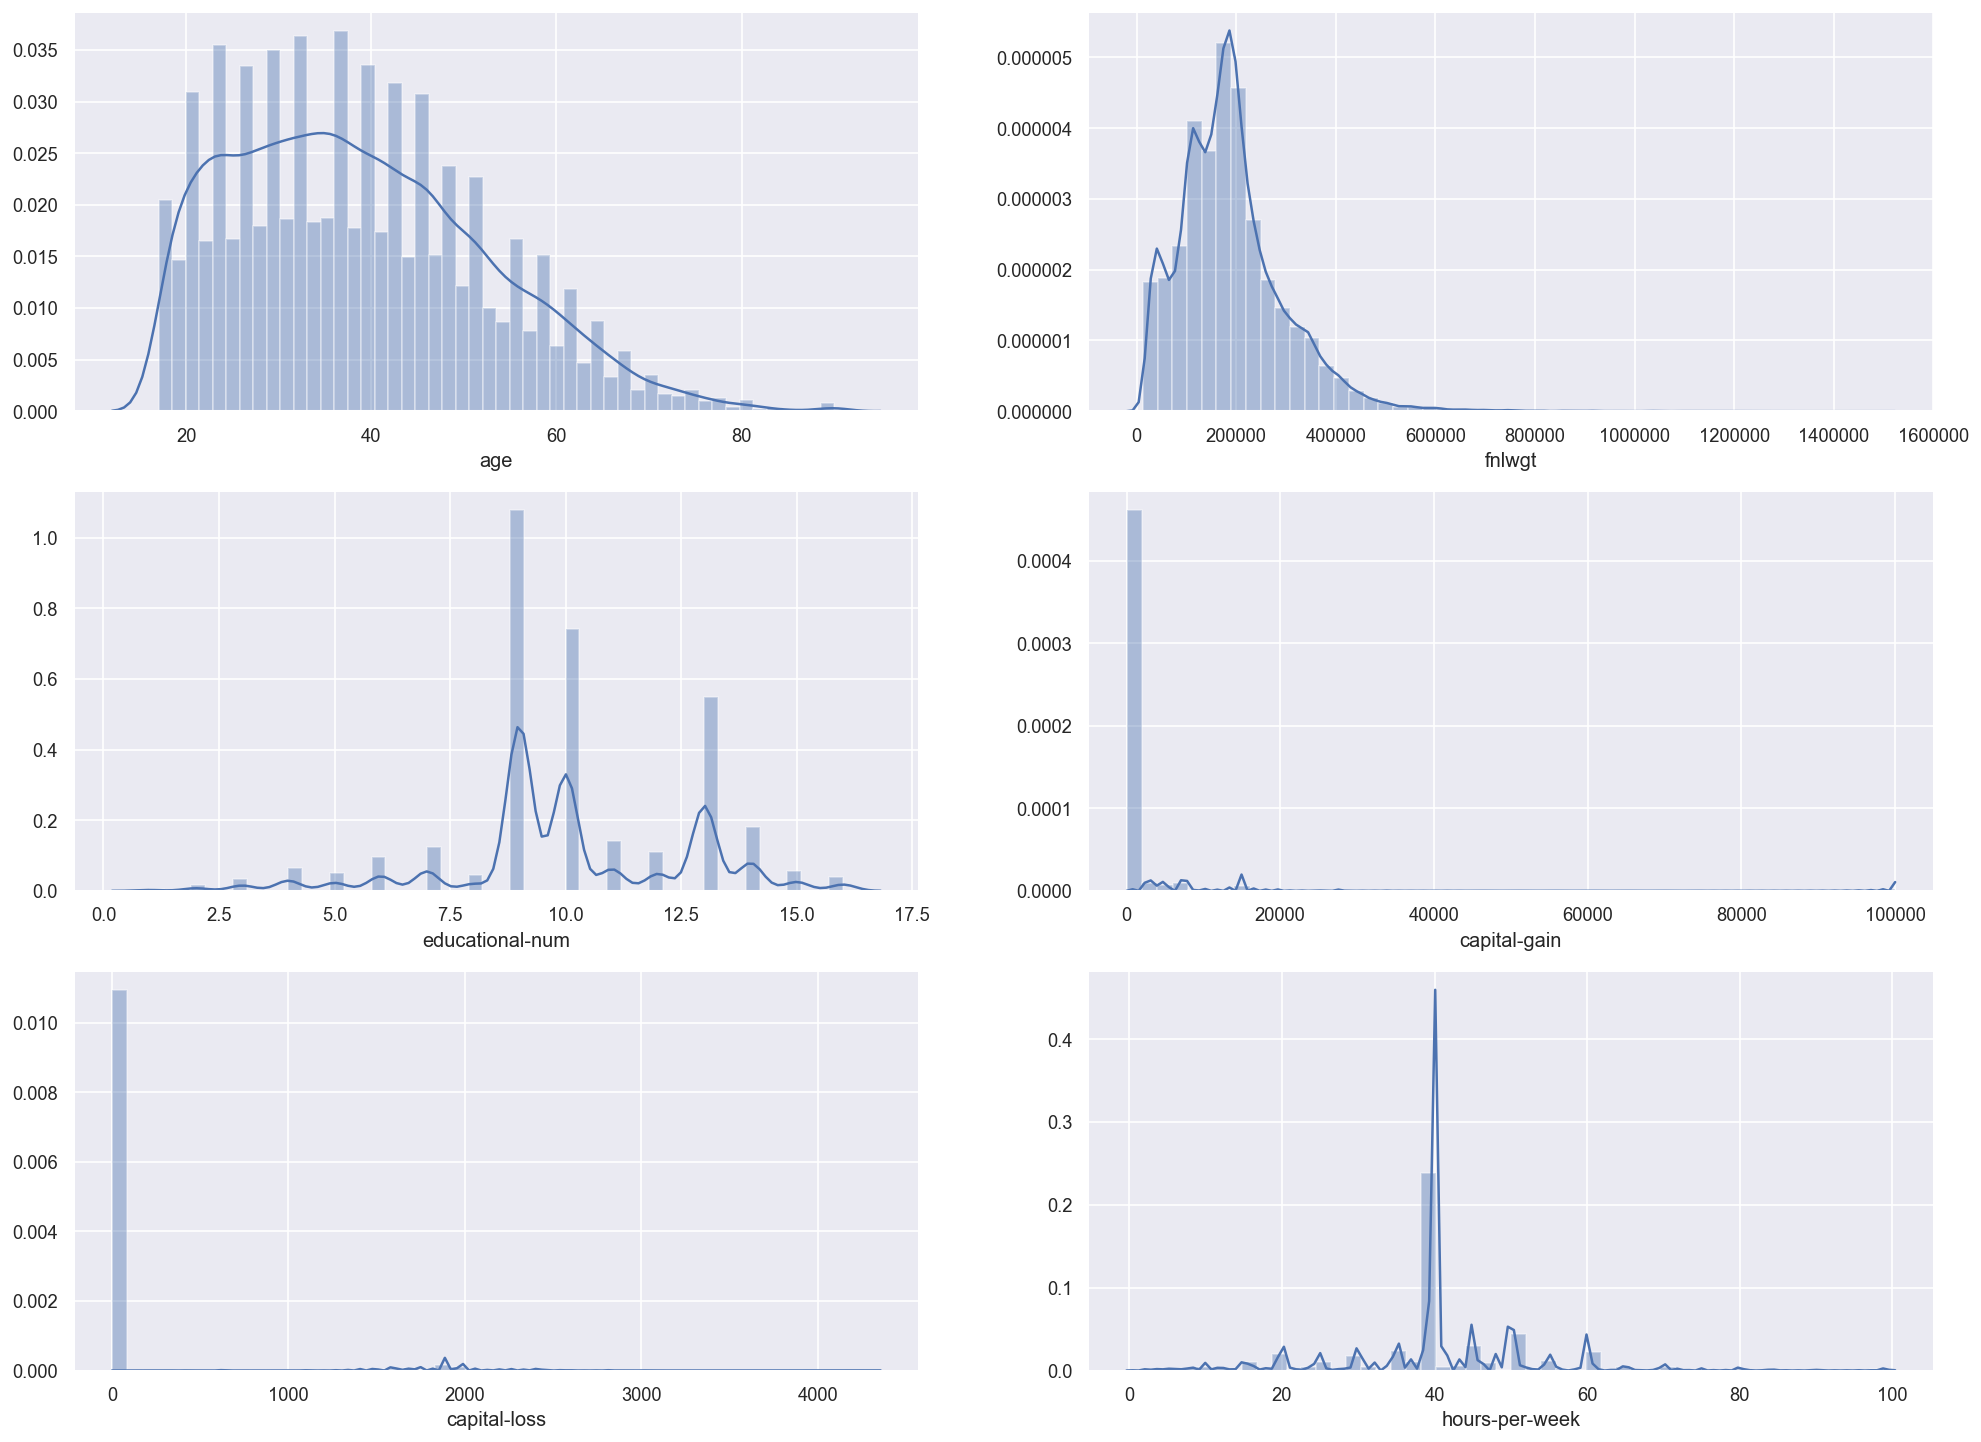

In [16]:
fig, ax = plt.subplots(3,2, figsize=(20,15),dpi=120)
sns.set()
sns.distplot(fill_df['age'],ax=ax[0][0])              
sns.distplot(fill_df['fnlwgt'],ax=ax[0][1])
sns.distplot(fill_df['educational-num'],ax=ax[1][0])              
sns.distplot(fill_df['capital-gain'],ax=ax[1][1])
sns.distplot(fill_df['capital-loss'],ax=ax[2][0])              
sns.distplot(fill_df['hours-per-week'],ax=ax[2][1])
plt.show()

* **The age variable is an assymetric distribution with right skew and ranges from 17 to 90**
* **This is another assymetric right-tailed distribution**

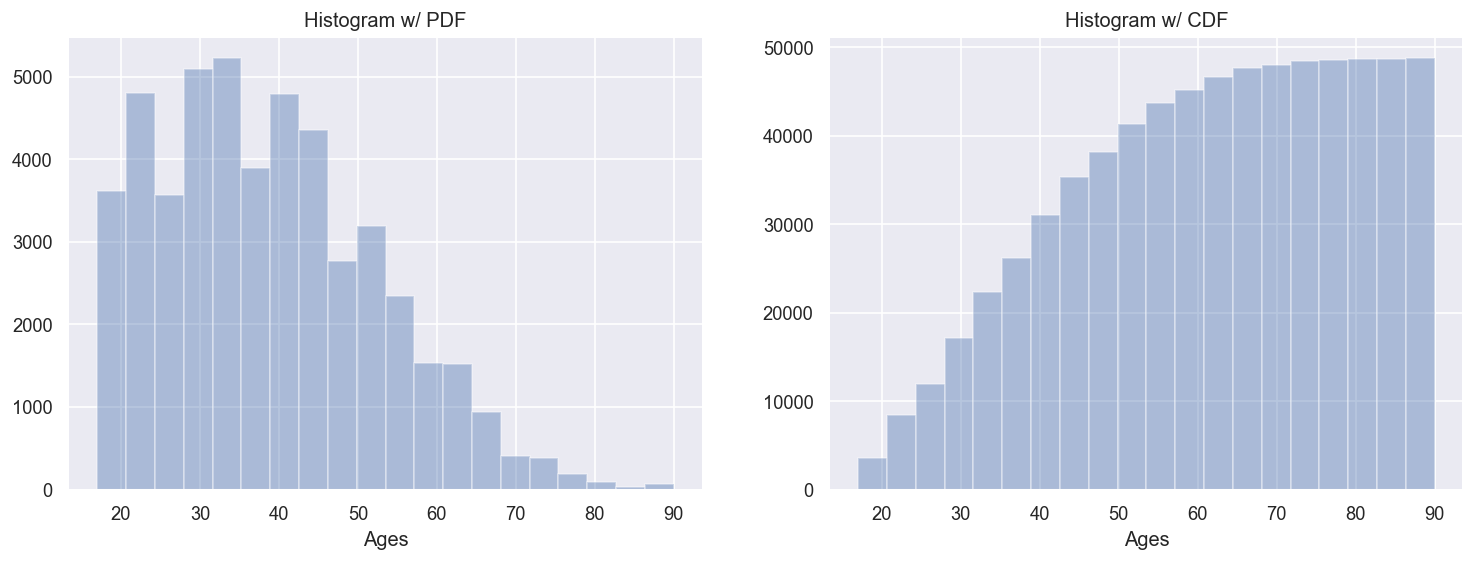

In [17]:
#"Age" distibution using histogram, pdf and cdf 
dt = fill_df
sns.set()

fig, ax = plt.subplots(1,2, figsize=(15,5),dpi=120)
ax[0].set_title("Histogram w/ PDF")
ax[1].set_title("Histogram w/ CDF")
args_cum = {"cumulative":True}
sns.distplot(dt["age"], bins=20, kde=False, axlabel='Ages', ax=ax[0]) 
sns.distplot(dt["age"], bins=20, kde=False, axlabel='Ages',hist_kws=args_cum, ax=ax[1])

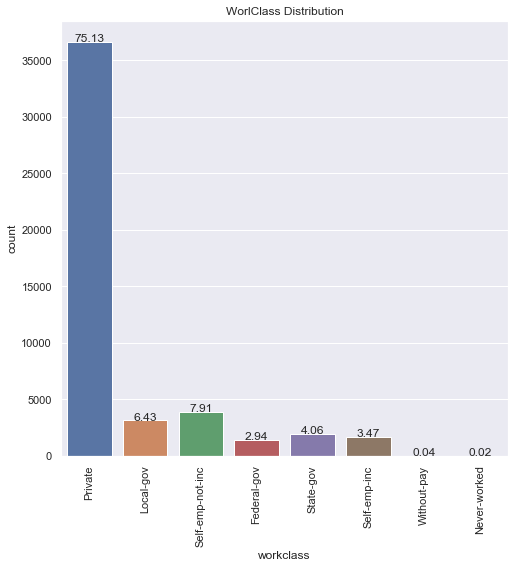

In [18]:
plt.figure(figsize=(8,8))

total = float(len(fill_df['income']))

a = sns.countplot(x='workclass',data = fill_df)

a.set_xticklabels(a.get_xticklabels(), rotation = 90)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")

plt.title("WorlClass Distribution")
plt.show()

**Private sector employees accounted for an overwhelming majority (73.65%) of the data followed by those who are self employed but not yet incorporated their business in distant second (8.39%), and those without any source of income being the smallest group(0.05%)**


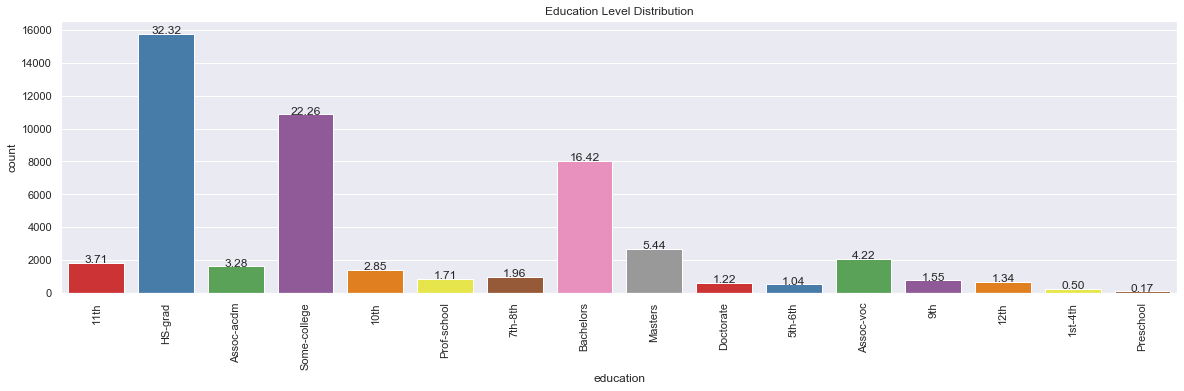

In [19]:

plt.figure(figsize=(20,5))


tot = float(len(fill_df))

a1 = sns.countplot(fill_df['education'], palette = 'Set1')
a1.set_xticklabels(a1.get_xticklabels(), rotation = 90)

for s in a1.patches:
    height = s.get_height()
    a1.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title("Education Level Distribution")
plt.show()

**32.69% of those that made up this data had graduated High School, followed closely by those got some form of college education(21.89%), while those who had only Preschool education made up the smallest of the group(0.16%)**


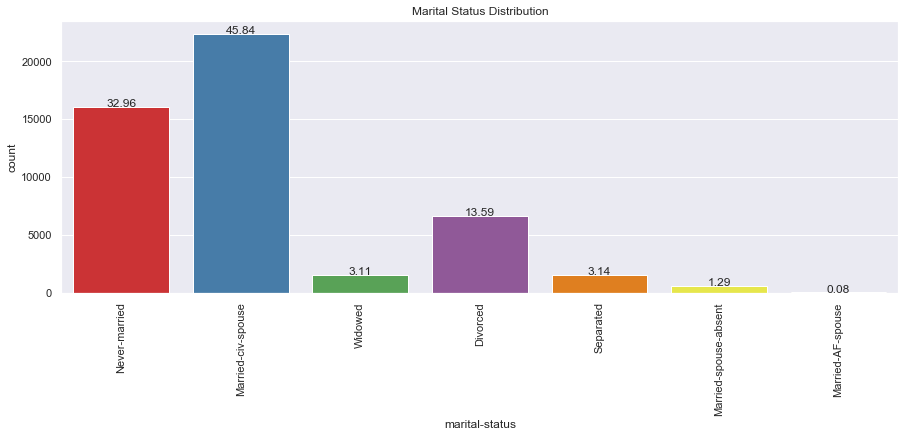

In [20]:
plt.figure(figsize=(15,5))



tot = float(len(fill_df))

ax = sns.countplot(fill_df['marital-status'], palette = 'Set1')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

for s in ax.patches:
    height = s.get_height()
    ax.text(s.get_x() + s.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title("Marital Status Distribution")
plt.show()

**Those that fell into the 'Married-civ-spouse' category accounted for almost have of the total number of respondents(46.56%), followed by those who were never married (32.28%), 'Divorced' made up the third largest group (13.92%) and the least group were the 'Married-AF-spouse' category (0.07%)**

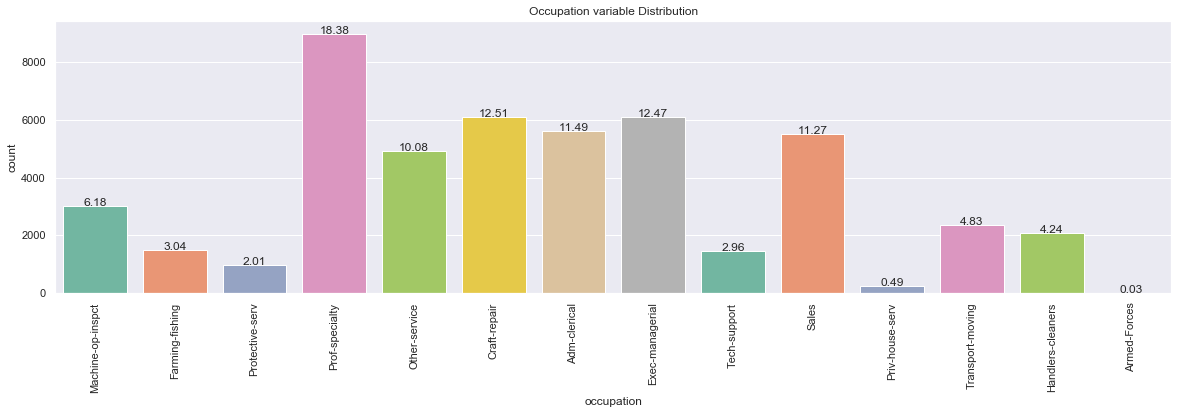

In [21]:
plt.figure(figsize=(20,5))


tot = float(len(fill_df))

ay = sns.countplot(fill_df['occupation'], palette = 'Set2')
ay.set_xticklabels(ay.get_xticklabels(), rotation = 90)

for s in ay.patches:
    height = s.get_height()
    ay.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title('Occupation variable Distribution')
plt.show()

**Craft-repair accounts for 13.31% of the total occupation reported closely by Prof (13.29%), Exec-managerial (13.23%) and Adm-cleric (12.25%) with the smallest group being the armed forces(0.03%)**

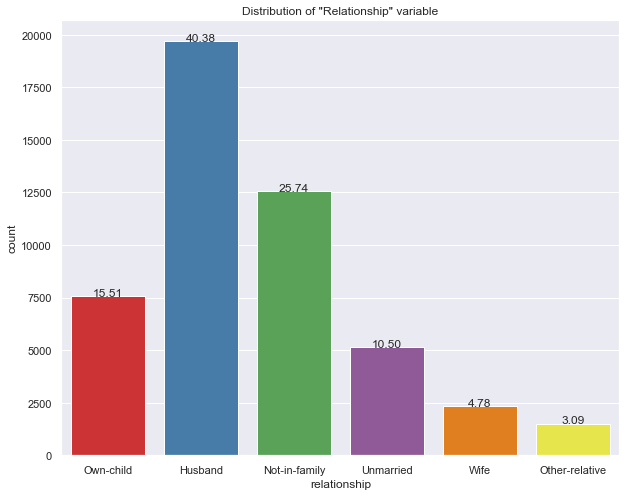

In [22]:

plt.figure(figsize=(10,8))


tot = float(len(fill_df))

az = sns.countplot(fill_df['relationship'], palette = 'Set1')
#az.set_xticklabels(az.get_xticklabels(), rotation = 90)

for s in az.patches:
    height = s.get_height()
    az.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title('Distribution of "Relationship" variable')
plt.show()

**The above is a look into the 'realtionship' variable, with Husbands accounting 41.28%, followed by Not-in-family (25.88%), with Other-relative being the least(2.98%)**

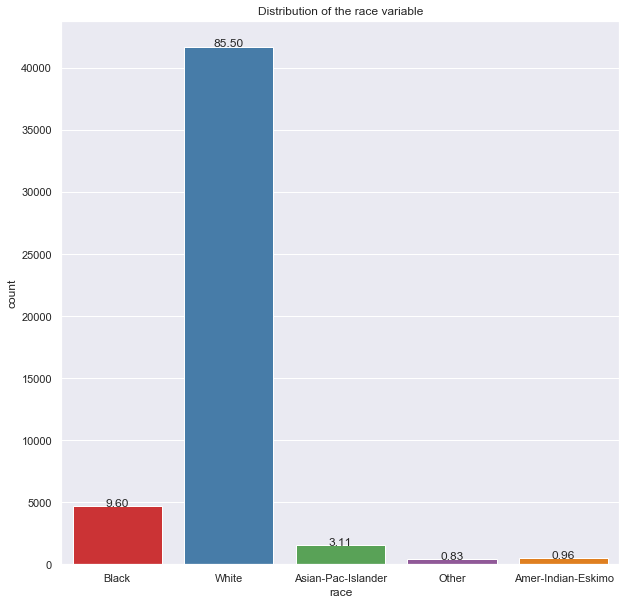

In [23]:
plt.figure(figsize=(10,10))


tot = float(len(fill_df))

aj = sns.countplot(fill_df['race'], palette = 'Set1')
#aj.set_xticklabels(aj.get_xticklabels(), rotation = 90)

for s in aj.patches:
    height = s.get_height()
    aj.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title("Distribution of the race variable")
plt.show()

**Majority of respondents (86.03%) were White, followed by Black (9.35%)**

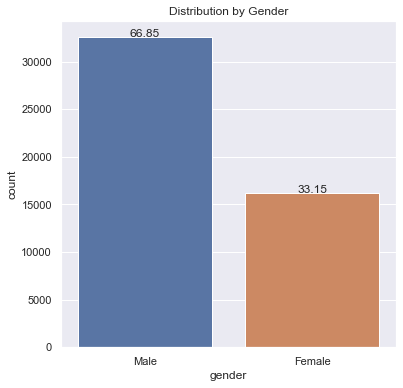

In [24]:
plt.figure(figsize=(6,6))


tot = float(len(fill_df))

ap = sns.countplot(fill_df['gender'])
#ap.set_xticklabels(ap.get_xticklabels(), rotation = 90)

for s in ap.patches:
    height = s.get_height()
    ap.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title('Distribution by Gender')
plt.show()

**67.5% of respondents were male while 32.5% were female**

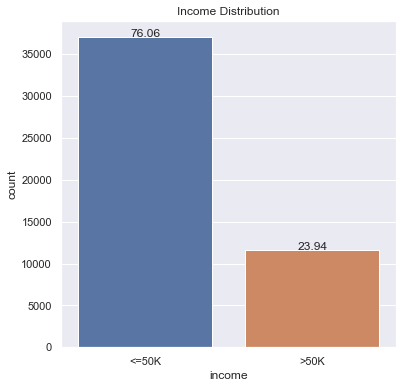

In [25]:
plt.figure(figsize=(6,6))


tot = float(len([fill_df]))

ab = sns.countplot(fill_df['income'])
#ab.set_xticklabels(ab.get_xticklabels(), rotation = 90)

for s in ab.patches:
    height = s.get_height()
    ab.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
    
plt.title("Income Distribution")
plt.show()

**There are 3times more respondents who earn 50000 dollars or less than those who earned above 50000 dollars**

### 5.2 Bivariate Analysis :

**Here we look at our different dependent variables and how they affect our target variable (income)**

Text(0.5, 1.0, 'Income distribution by Age')

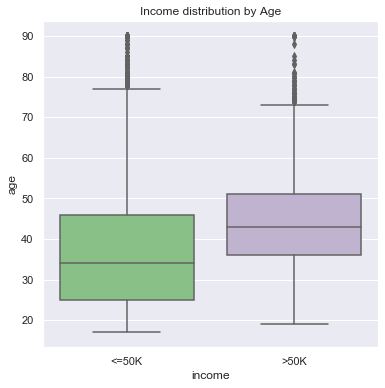

In [26]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'income', y = 'age', data = fill_df, palette = "Accent").set_title("Income distribution by Age")

Text(0.5, 1.0, 'Violin Plot of Age by Income')

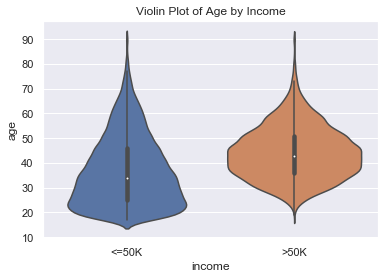

In [27]:
##Alternatively we can represent the above plot using a violin plot

sns.violinplot(x = 'income', y = 'age', data = fill_df, size = 6)
plt.title('Violin Plot of Age by Income')

**There is much variability between those who earn less than 50000 dollars and those who earn higher across ages. The median age for those who earn less than 50000 dollars is 34 while the median age of those who earn higher is 43**


posx and posy should be finite values
posx and posy should be finite values


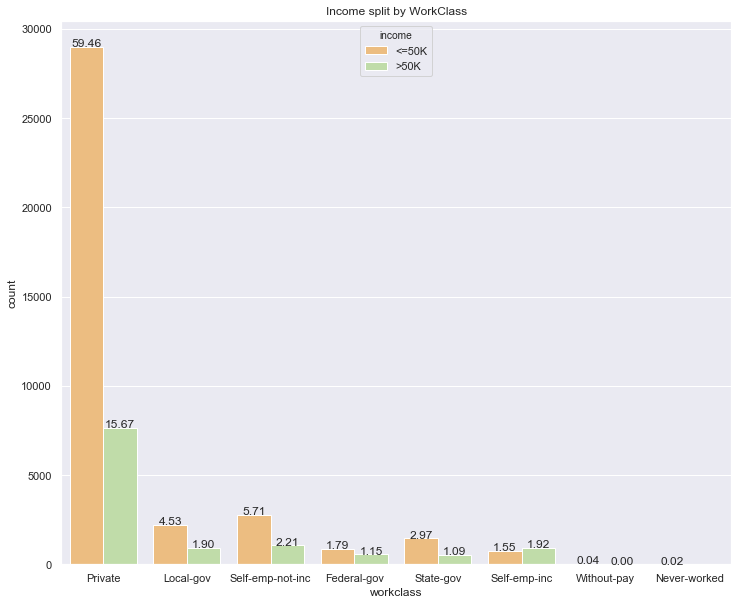

In [28]:
fig = plt.figure(figsize = (12,10))
ad = sns.countplot(x = 'workclass', hue = 'income', data = fill_df, palette = "Spectral")

#ad.set_xticklabels(ad.get_xticklabels(), rotation = 90)

for s in ad.patches:
    height = s.get_height()
    ad.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')

plt.title('Income split by WorkClass')
plt.show()

**The private sector accounts for the overwhelming number of those that earn below 50,000 dollars (26056), and also accounts for majority of those that earn above 50,000 dollars. Those in the without pay category account for the least across both income brackets.**

Text(0.5, 1.0, 'Income by Relationship')

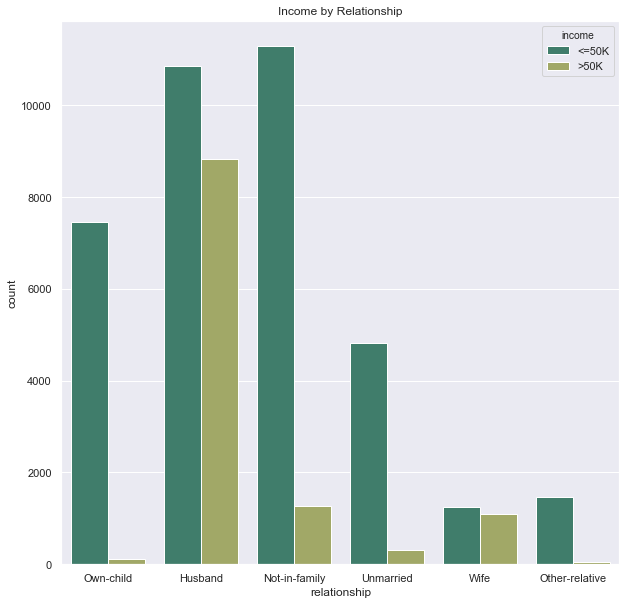

In [29]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'relationship', hue = 'income', data = fill_df, palette = "gist_earth").set_title('Income by Relationship')

**Across different relationship sub-category there are more of employees earning less than 50,000 dollars, with 'Not-in-family', 'Husband' and 'Own-child' accounting for the majority, while the Husband sub-category accounts for majority of earners above 50,000**

Text(0.5, 1, 'Income by Race across Gender')

<Figure size 1440x576 with 0 Axes>

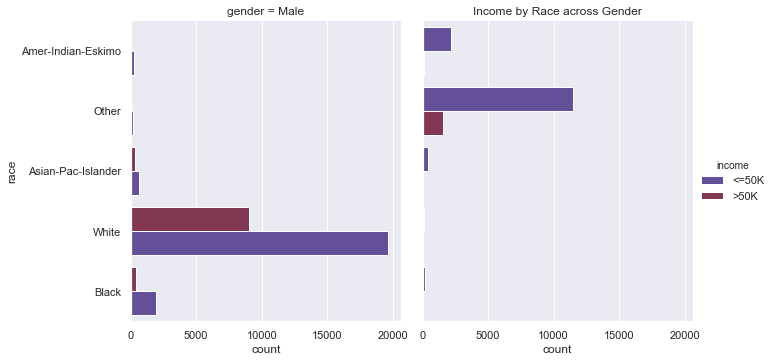

In [30]:
plt.figure(figsize = (20, 8))

sns.catplot(y = 'race', hue = 'income', col = 'gender', data = fill_df, kind = 'count', palette = 'twilight')
plt.title('Income by Race across Gender')

**As expected Whites account for majority of those earning 50,000 and below, and also above 50,000 across genders. Blacks come a distant second**

<Figure size 720x720 with 0 Axes>

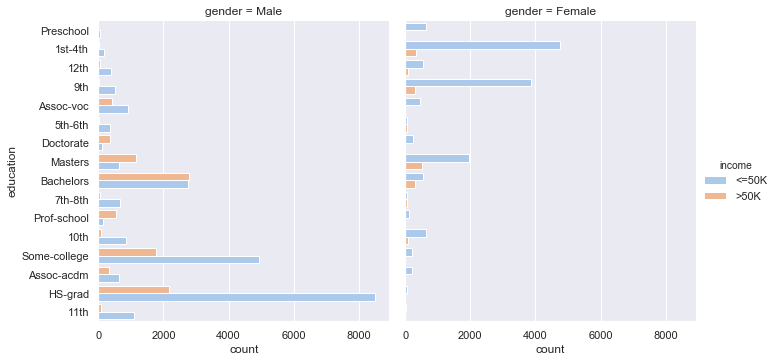

In [31]:
plt.figure(figsize = (10,10))

sns.catplot(y = 'education', hue = 'income', data = fill_df, kind = 'count', col = 'gender', palette = 'pastel')

**High School graduates account for the huge majority of 50,000 or less earners across genders, While the Bachelors Degree holders account for more the above 50,000 earners across genders**

<Figure size 576x576 with 0 Axes>

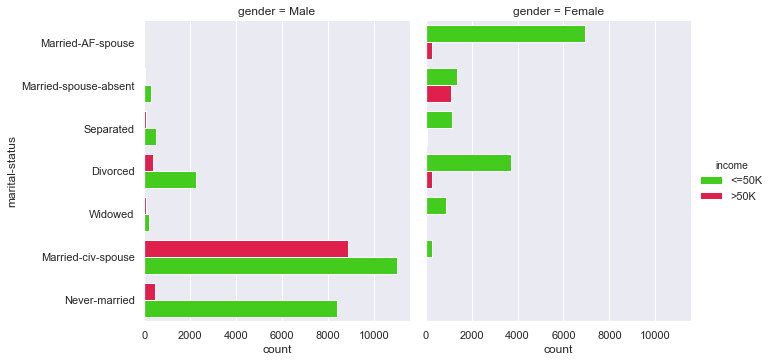

In [32]:
plt.figure(figsize = (8,8))
sns.catplot(y = 'marital-status', hue = 'income', col = 'gender', data = fill_df, palette = 'prism', kind = 'count')

**For the male gender the Married-civ-spouse account for majority of those who earn 50K and below as well as above 50K,followed by the Never-married sub category. For the female gender The Never-married sub marital category account for the highest number of 50K or below earners, while the Married-civ-spouse account for the highest number of above 50K earners**

<Figure size 720x720 with 0 Axes>

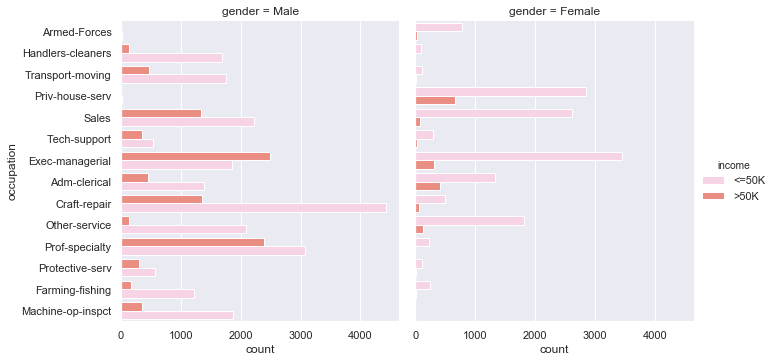

In [33]:
plt.figure(figsize = (10,10))
sns.catplot(y = 'occupation', hue = 'income', col = 'gender', kind = 'count', data = fill_df, palette = 'Set3_r')

**Majority of the males earning 50K or less are in the craft and repairs sub-group, while the highest earners are more in the Prof sub-group. Majority of the women who earn 50K or less annually are in the admin/clerical sub-group, closely followed by those in other-service. Their highest earners are in the Prof sub-group.**

**Interestingly there are more women earning 50K or less in the Prof group than those who earn above, compared to the men in the same sub-group where the opposite is the case.**

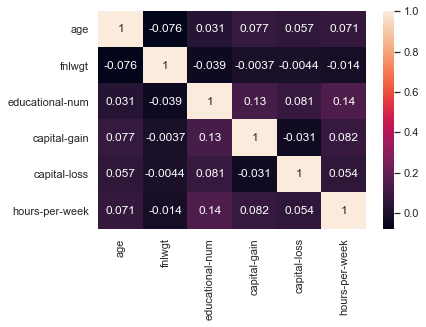

In [34]:
cor=fill_df.corr()
sns.heatmap(cor,annot=True)

**There is very low correlation between the columns**

<Figure size 720x360 with 0 Axes>

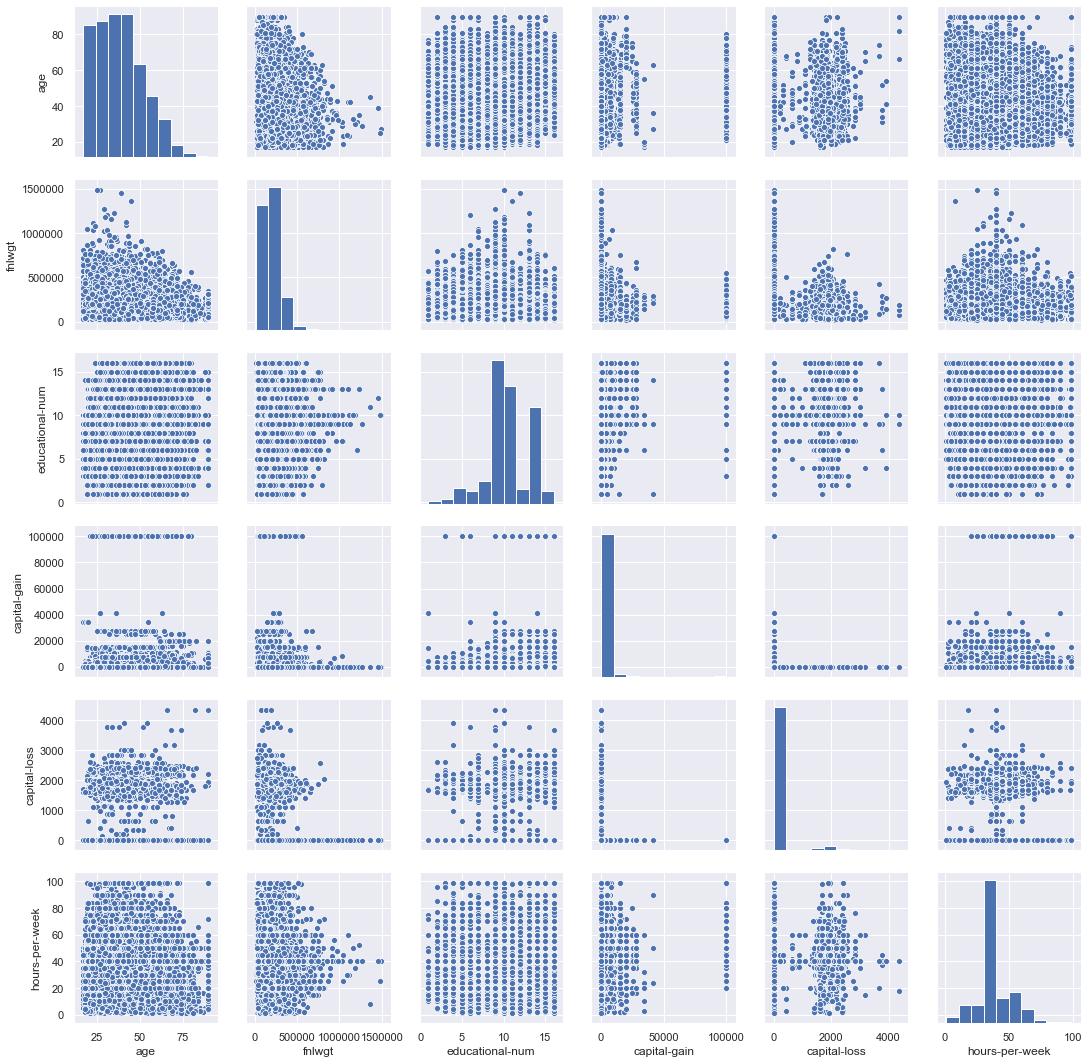

In [35]:
plt.figure(figsize=(10,5))
sns.pairplot(fill_df)

# 6. Data Transformation

In [36]:
fill_df.drop(['educational-num', 'native-country', 'relationship'], axis = 1, inplace = True)

**The 'education rank' variable is dropped since they correlate with the 'education' variable. Instead we'll recode the variable as integers**

In [37]:
### We proceed to code the various categorical variables
ed = set(fill_df['education'])
wc = set(fill_df['workclass'])
ms = set(fill_df['marital-status'])
occ = set(fill_df['occupation'])
gen = set(fill_df['gender'])
inc = set(fill_df['income'])
race = set(fill_df['race'])

In [38]:
fill_df['education'] = fill_df['education'].map({'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3,
                                              '9th': 4, '10th': 5, '11th': 6, '12th': 7, 'HS-grad': 8,
                                              'Some-college': 9, 'Assoc-voc': 10, 'Assoc-acdm': 11,
                                              'Bachelors': 12, 'Masters': 13, 'Doctorate': 14, 'Prof-school': 15}).astype(int)

In [39]:
fill_df['workclass'].fillna(fill_df['workclass'].mode()[0],inplace=True)


In [40]:
fill_df['workclass'] = fill_df['workclass'].map({'Without-pay': 0, 'Self-emp-not-inc': 1, 'Self-emp-inc': 2,
                                              'Local-gov': 3, 'State-gov': 4, 'Federal-gov': 5, 'Private': 6, 'Never-worked' : 7}).astype('int64')

In [41]:
fill_df['marital-status'] = fill_df['marital-status'].map({'Never-married': 0, 'Separated': 1, 'Divorced': 2,
                                                        'Widowed': 3, 'Married-spouse-absent': 4, 'Married-civ-spouse': 5, 'Married-AF-spouse': 6}).astype(int)

In [42]:
fill_df['occupation'] = fill_df['occupation'].map({'Other-service': 0, 'Craft-repair': 1, 'Priv-house-serv': 2,
                                                'Handlers-cleaners': 3, 'Farming-fishing': 4, 'Adm-clerical': 5,
                                                'Transport-moving': 6, 'Machine-op-inspct': 7, 'Sales': 8, 'Armed-Forces': 9,
                                                'Tech-support': 10, 'Protective-serv': 11, 'Exec-managerial': 12,
                                                'Prof-specialty': 13}).astype(int)


In [43]:
fill_df['gender'] = fill_df['gender'].map({'Female': 0, 'Male': 1}).astype(int)

In [44]:
fill_df['income'] = fill_df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [45]:

fill_df['race'] = fill_df['race'].map({'Other': 0, 'Amer-Indian-Eskimo': 1, 'Asian-Pac-Islander': 2, 'Black': 3,
                                    'White': 4}).astype(int)

In [46]:
#X=trasn_df.drop('income_>50K',axis=1)
#y=trasn_df['income_>50K']

**Dividing Data into X and y**

In [47]:
#trasn_df=pd.get_dummies(fill_df,drop_first=True)

**Getting Dummies for Category columns**

In [48]:
#ss=StandardScaler()
#mm=MinMaxScaler()
#col=['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']


In [49]:
#trasn_df[col]=mm.fit_transform(X[col])

**Standardizing the integer columns**

In [50]:
#trasn_df

# 7.Chi-square test :

**Null hypothesis:  𝐻0 : income <= 50k**                 

**Alternative hypothesis:  𝐻𝐴 : income > 50k**

In [51]:
X=fill_df.drop('income',axis=1)
y=fill_df['income']

In [52]:
stat,pval=chi2(X,y)

In [53]:
round(pval.mean(),6)

1e-06

In [54]:
stat.mean()

11550065.008298852

# Statsmodelling :

In [55]:
from statsmodels.tools import add_constant as add_constant
fill_df_constant=add_constant(fill_df)
fill_df_constant.head()

C:\Users\Bbbbb\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,income
0,1.0,25,6,226802,6,0,7,3,1,0,0,40,0
1,1.0,38,6,89814,8,5,4,4,1,0,0,50,0
2,1.0,28,3,336951,11,5,11,4,1,0,0,40,1
3,1.0,44,6,160323,9,5,7,3,1,7688,0,40,1
4,1.0,18,6,103497,9,0,13,4,0,0,0,30,0


In [56]:
cols=fill_df_constant.columns[:-1]
cols

Index(['const', 'age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [57]:
model=sm.Logit(fill_df_constant.income,fill_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.333603
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48790
Model:                          Logit   Df Residuals:                    48778
Method:                           MLE   Df Model:                           11
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.3939
Time:                        16:58:23   Log-Likelihood:                -16277.
converged:                       True   LL-Null:                       -26854.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.2907      0.163    -63.262      0.000     -10.610      -9.972
age                0.0180      0.001     15.193      0.000       0.016       0.020
workclass          0.0575      0.008      7.012      0.000       0.041       0.074
fnlwgt          6.603e-07   1.33e-07      4.956      0.000    3.99e-07    9.21e-07
education          0.3132      0.007     46.566      0.000       0.300       0.326
marital-status     0.5884      0.010     61.744      0.000       0.570       0.607
occupation         0.0673      0.003     19.510      0.000       0.061       0.074
race               0.1418      0.025      5.593      0.000       0.092       0.191
gender             0.3327      0.038      8.770      0.000       0.258       0.407
capital-gain       0.0003   8.26e-06     38.916      0.000       0.000       0.000
capital-loss       0.0007   2.96e-05     22.496      0.000       0.001       0.001
hours-per-week     0.0306      0.001     25.286      0.000       0.028       0.033
==================================================================================
"""

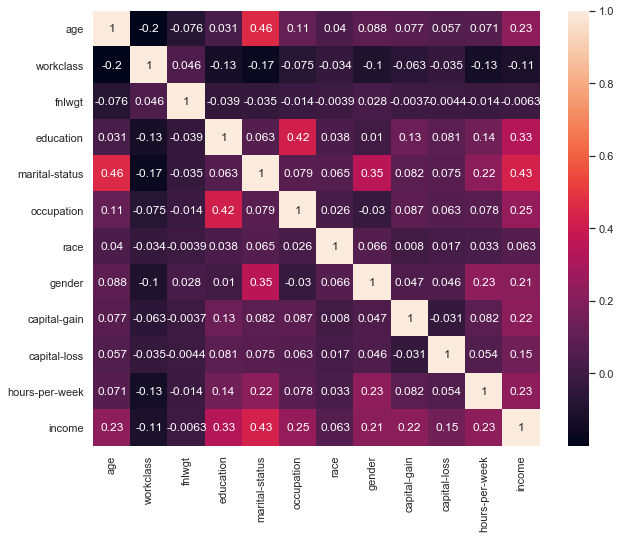

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(fill_df.corr(),annot=True)
plt.show()

In [59]:
#logistic regrssion
X = fill_df.drop('income', axis = 1)
y = fill_df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30, stratify = y)

print("Size of the train dataset: ", len(X_train))
print("Size of the test dataset: ", len(X_test))

Size of the train dataset:  34153
Size of the test dataset:  14637


In [60]:
##In fitting our logistic model we take into account that this is an unbalanced dataset,
logmodel = LogisticRegression(solver = 'lbfgs', max_iter = 200)

logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
pred = logmodel.predict(X_test)

print(confusion_matrix(y_test, pred))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y_test)))

[[10780   353]
 [ 2597   907]]
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


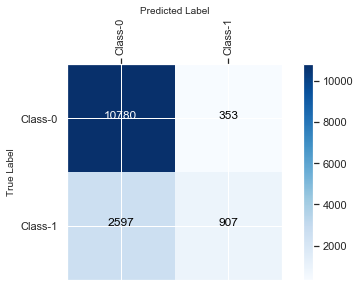

In [62]:
##Plot the Confusion Matrix
import itertools
matrix = confusion_matrix(y_test, pred)

plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

plt.imshow(matrix, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.colorbar()

fmt = 'd'

thresh = matrix.max()/2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), 
            horizontalalignment = 'center', color = 'white' if matrix[i, j] > thresh else 'black')
    
class_names = ['Class-0', 'Class-1']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation = 90)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True Label', size = 10)
plt.xlabel('Predicted Label', size = 10)
plt.show()

In [63]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     13377
           1       0.26      0.72      0.38      1260

    accuracy                           0.80     14637
   macro avg       0.61      0.76      0.63     14637
weighted avg       0.91      0.80      0.84     14637



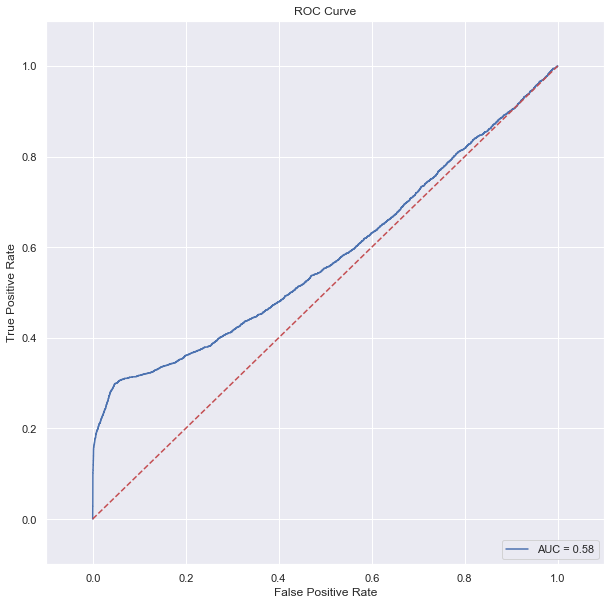

In [64]:
pred_prob = logmodel.predict_proba(X_test)

y_preds = pred_prob[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_preds)
auc_score = metrics.auc(fpr, tpr)
#plt.pred_prob()
plt.figure(figsize = (10,10))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [65]:
##Tune the hyper-parameters by cross validation
n_splits = 15 ##specify the number of splits

kfold = KFold(n_splits, random_state = 20) ##splits the data set into n folds for evaluation

result = cross_val_score(logmodel, X, y, cv = kfold, scoring = 'accuracy')

##The accuracy of the k-fold cross-validation can be obtained from the mean of the results
print('Accuarcy: %.3f (%.3f)' % (result.mean(), result.std()))


C:\Users\Bbbbb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bbbbb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Bbbbb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuarcy: 0.800 (0.005)


In [66]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth = 10)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
prediction = tree_model.predict(X_test)


print(confusion_matrix(y_test, prediction))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(tree_model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(tree_model.score(X_test, y_test)))

[[10599   534]
 [ 1489  2015]]
Accuracy of Logistic regression classifier on training set: 0.87
Accuracy of Logistic regression classifier on test set: 0.86


In [68]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     12088
           1       0.58      0.79      0.67      2549

    accuracy                           0.86     14637
   macro avg       0.76      0.83      0.79     14637
weighted avg       0.89      0.86      0.87     14637



In [69]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state =0, n_jobs = -1, n_estimators = 20, class_weight = 'balanced').fit(X_train, y_train)

pred2 = clf.predict(X_test)

print(confusion_matrix(y_test, pred2))

print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

[[10433   700]
 [ 1443  2061]]
Accuracy of RandomForest classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.85


In [70]:
print(classification_report(pred2, y_test))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     11876
           1       0.59      0.75      0.66      2761

    accuracy                           0.85     14637
   macro avg       0.76      0.81      0.78     14637
weighted avg       0.87      0.85      0.86     14637



In [71]:
##Apply kfolds cross_validation
n_splits = 10
kfold1 = KFold(n_splits, random_state = 20)
result1 = cross_val_score(clf, X, y, cv = kfold1, scoring = 'accuracy')
print('Accuarcy: %.3f (%.3f)' % (result1.mean(), result1.std()))

Accuarcy: 0.853 (0.004)


In [73]:
#Feature Selection
important = clf.feature_importances_

feature_importance = np.array(important)
feature_names = np.array(feature_names)

data = {'feature_names': feature_names, 'feature_importance': important}
df = pd.DataFrame(data)

df.sort_values(by = ['feature_importance'], ascending = False, inplace = True)
#fig, ax = plt.subplots()
plt.figure(figsize = (10, 8))
#plt.bar([x for x in range(len(important))], important)
sns.barplot(x = df['feature_importance'], y = df['feature_names'], palette = 'twilight')
plt.ylabel('Feature')
plt.xlabel('Realtive Importance')
#ax.set_xticklabels(feature_names, minor = False)
plt.title("Feature Importance in Random Classifier")
plt.show()

NameError: name 'feature_names' is not defined

In [74]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn_class = KNeighborsClassifier(n_neighbors = 16).fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)

print(confusion_matrix(knn_pred, y_test))

print(classification_report(knn_pred, y_test))

[[10970  2760]
 [  163   744]]
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     13730
           1       0.21      0.82      0.34       907

    accuracy                           0.80     14637
   macro avg       0.60      0.81      0.61     14637
weighted avg       0.94      0.80      0.85     14637



Text(0, 0.5, 'Accuarcy Rate')

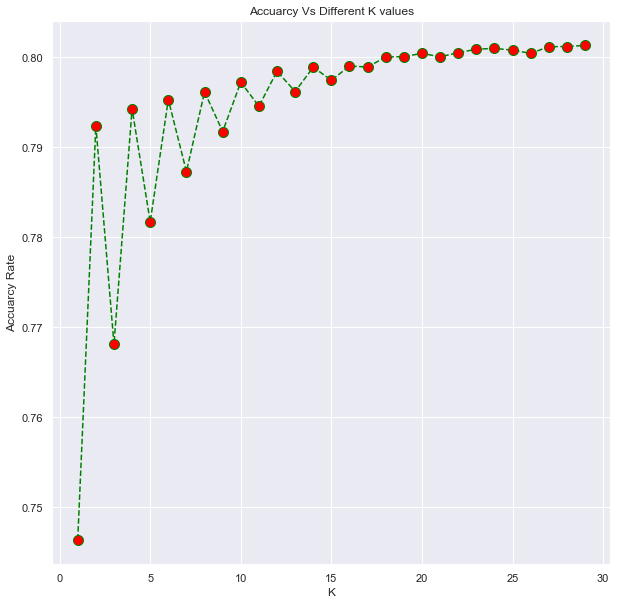

In [75]:
accrate = list()

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(knn, X, y, cv = 10)
    accrate.append(score.mean())


plt.figure(figsize = (10,10))
plt.plot(range(1, 30), accrate, color = 'green', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 10)

plt.title('Accuarcy Vs Different K values')
plt.xlabel('K')
plt.ylabel('Accuarcy Rate')